In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #just in case, regularly update your lucem_illud with the following code: pip install git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

import wordcloud #Makes word clouds

#All these packages need to be installed from pip
import requests #for http requests
import bs4 #called `beautifulsoup4`, an html parser
import pandas #gives us DataFrames
import docx #reading MS doc files, install as `python-docx`

#Stuff for pdfs
#Install as `pdfminer2`
import pdfminer.pdfinterp
import pdfminer.converter
import pdfminer.layout
import pdfminer.pdfpage

#These come with Python
import re #for regexs
import urllib.parse #For joining urls
import io #for making http requests look like files
import json #For Tumblr API responses
import os.path #For checking if files exist
import os #For making directories

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

In [3]:
mecw = pandas.read_csv(r'C:\Users\super\comp_work\Homework-Notebooks\votava_project_data\mecw_frag.csv')

In [19]:
capital = mecw.loc[mecw['vol_name'].isin(["Volume 35"])]

In [23]:
pandas.options.display.max_rows = 999
capital[500:800]

,index,vol_source,vol_name,link_source,link_name,paragraph_text
119097,199,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,"24. In Homer, for instance, the value of an a..."
119098,200,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,"25. For this reason, we can speak of the coat..."
119099,201,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,26. It is by no means self-evident that this ...
119100,202,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,"26a. In the German edition, there is the foll..."
119101,203,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,27. Among the ancient Germans the unit for me...
119102,204,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,"28. When, therefore, Galiani says: Value is a..."
119103,205,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,29. What are we to think of a law that assert...
119104,206,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,30. Even Ricardo has his stories à la Robinso...
119105,207,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,31. “A ridiculous presumption has latterly g...
119106,208,http://hiaw.org/defcon6/works/cw/volume35/inde...,Volume 35,http://hiaw.org/defcon6/works/1867-c1/ch01.htm...,Section 1. The Two Factors of a Commodity: Use...,32. The insufficiency of Ricardo’s analysis o...


In [38]:
sample = set()
filt = re.compile('ch[0-9]*.html$')
for name in capital.link_source:
    if re.search(filt,name):
        sample.add(name)
print(sample)

{'http://hiaw.org/defcon6/works/1867-c1/ch29.html', 'http://hiaw.org/defcon6/works/1867-c1/ch31.html', 'http://hiaw.org/defcon6/works/1867-c1/ch17.html', 'http://hiaw.org/defcon6/works/1867-c1/ch13.html', 'http://hiaw.org/defcon6/works/1867-c1/ch10.html', 'http://hiaw.org/defcon6/works/1867-c1/ch02.html', 'http://hiaw.org/defcon6/works/1867-c1/ch05.html', 'http://hiaw.org/defcon6/works/1867-c1/ch07.html', 'http://hiaw.org/defcon6/works/1867-c1/ch01.html', 'http://hiaw.org/defcon6/works/1867-c1/ch18.html', 'http://hiaw.org/defcon6/works/1867-c1/ch28.html', 'http://hiaw.org/defcon6/works/1867-c1/ch32.html', 'http://hiaw.org/defcon6/works/1867-c1/ch26.html', 'http://hiaw.org/defcon6/works/1867-c1/ch04.html', 'http://hiaw.org/defcon6/works/1867-c1/ch19.html', 'http://hiaw.org/defcon6/works/1867-c1/ch25.html', 'http://hiaw.org/defcon6/works/1867-c1/ch27.html', 'http://hiaw.org/defcon6/works/1867-c1/ch16.html', 'http://hiaw.org/defcon6/works/1867-c1/ch22.html', 'http://hiaw.org/defcon6/works

In [40]:
capital_chaps = capital.loc[capital['link_source'].isin(sample)]

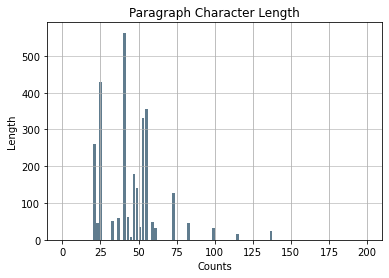

In [53]:
lengths = []
for text in capital_chaps.link_name:
    lengths.append(len(text))
    
import pandas as pd

# Generate data on commute times.
size, scale = 1000, 10
commutes = pd.Series(lengths)

commutes.plot.hist(range=(0,200),grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Paragraph Character Length')
plt.xlabel('Counts')
plt.ylabel('Length')
plt.grid(axis='y', alpha=0.75)

In [55]:
capclean = capital_chaps.drop_duplicates(subset='paragraph_text', keep='first', inplace=False, ignore_index=True)

In [58]:
capclean.to_csv(r'C:\Users\super\comp_work\Homework-Notebooks\votava_project_data\capital.csv', index_label=False, sep=',')